In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [4]:
df['btc_market_price'].iloc[1023]

13.6888

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 


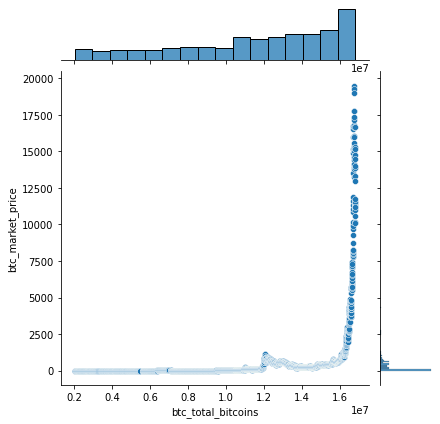

In [6]:
sns.jointplot(x ='btc_total_bitcoins' , y = "btc_market_price", 
              kind = "scatter", data = df)  
plt.show() 


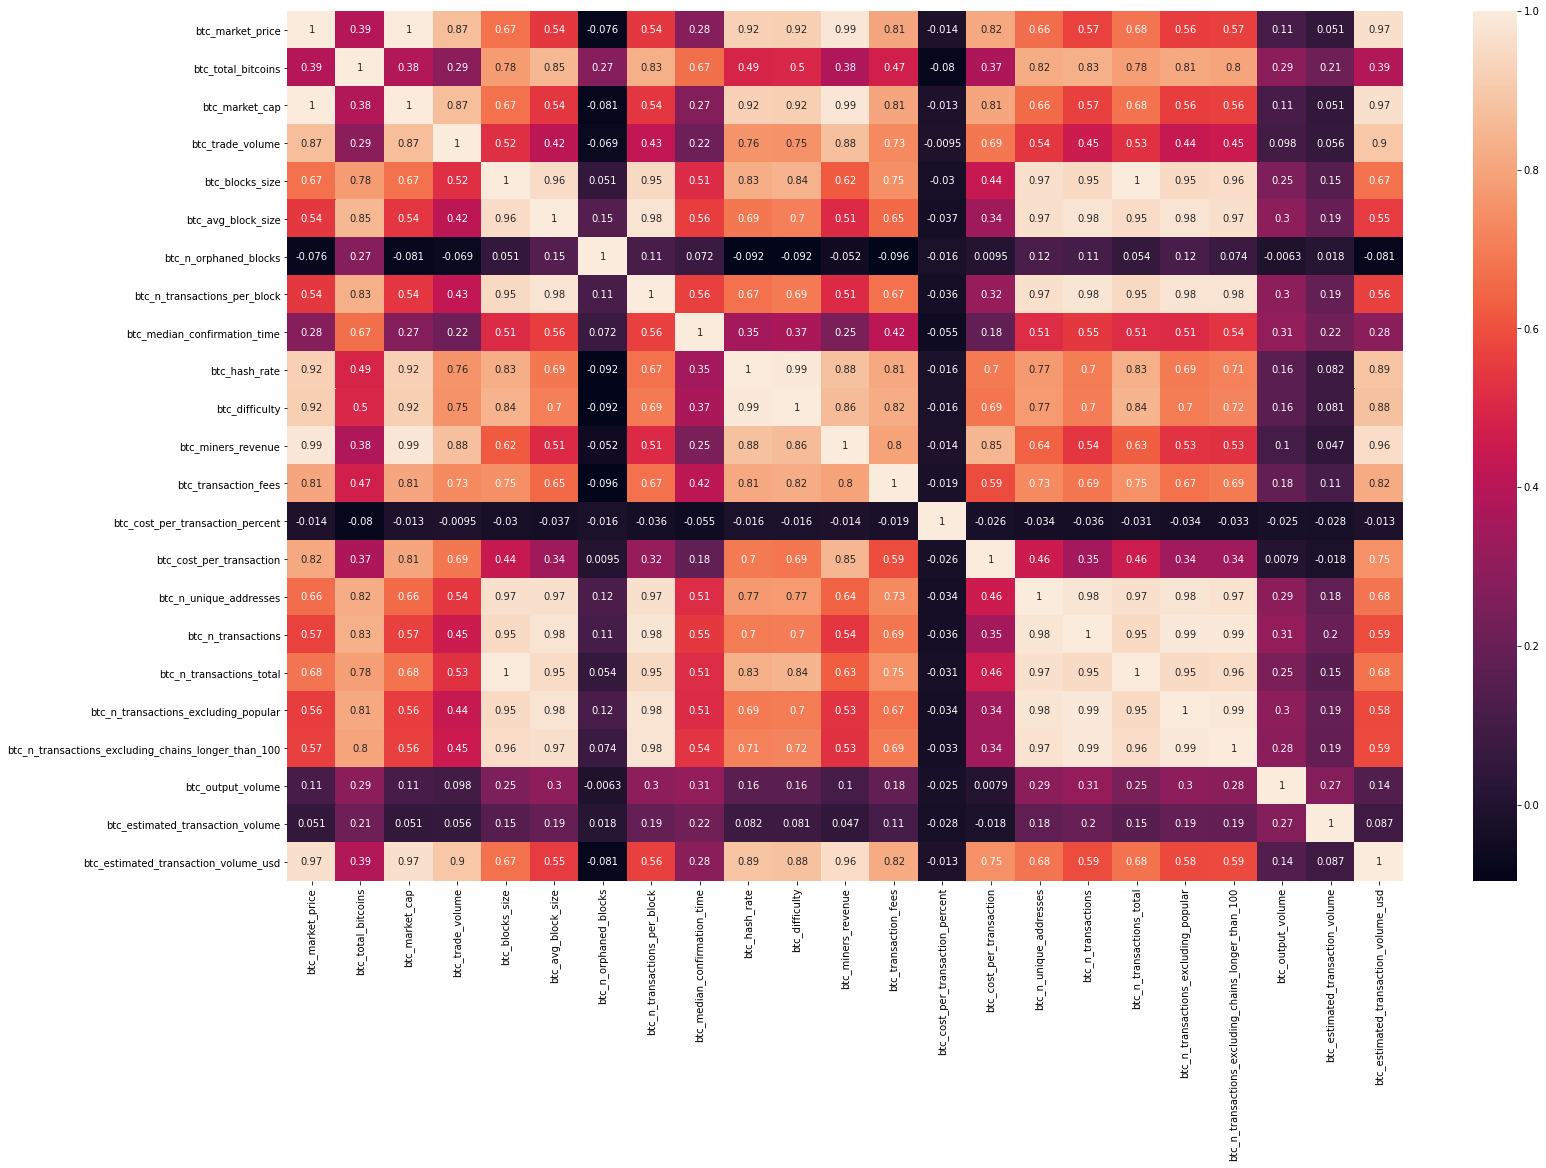

In [7]:
plt.figure(figsize=(25, 16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
df.fillna(df['btc_total_bitcoins'].mean(), inplace = True) 
df.fillna(df['btc_trade_volume'].mean(), inplace = True) 
df.fillna(df['btc_blocks_size'].mean(), inplace = True) 
df.fillna(df['btc_median_confirmation_time'].mean(), inplace = True) 
df.fillna(df['btc_difficulty'].mean(), inplace = True) 
df.fillna(df['btc_transaction_fees'].mean(), inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2906 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2906 non-null   float64
 5   btc_blocks_size                                      2906 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
#normal distribution of target variable
df1=np.log1p(df['btc_market_price'])
df.drop('btc_market_price',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)


In [11]:
train_x,test_x,train_y,test_y=train_test_split(df,df1,test_size=0.25,random_state=0)

In [12]:
model=LinearRegression()
model.fit(train_x,train_y)
o=model.predict(test_x)
print(mean_squared_error(test_y,o))


0.18833537648656526
